In [1]:
#Dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Read the UCR dataset
ucr_data = pd.read_csv("FBI's UCR - SLC.csv")

# Read the census dataset
census_data = pd.read_csv('census_data.csv')

# Merge the two datasets on the "Group" column
merged_data = pd.merge(ucr_data, census_data, on='Group')

In [3]:
# Calculate crime rate for each city
merged_data['Crime_Rate'] = merged_data['Incident_ID'] / merged_data['Population']

# Group by city and calculate mean crime rate
crime_rates = merged_data.groupby('Group')['Crime_Rate'].mean().round(2)

print(crime_rates)

Group
NORTH SALT LAKE             7773.67
SALT LAKE CITY             52861.82
SALT LAKE CNTY UNIFD PD     3396.26
SOUTH SALT LAKE             4489.46
Name: Crime_Rate, dtype: float64


In [4]:
# Convert the 'Incident_Date' column to a datetime format
ucr_data['Incident_Date'] = pd.to_datetime(ucr_data['Incident_Date'])

# Group by year and offense type, then calculate the count of incidents
crime_trends = ucr_data.groupby([ucr_data['Incident_Date'].dt.year, 'Offense_Type'])['Incident_ID'].count()

print(crime_trends)

Incident_Date  Offense_Type                               
2021           Aggravated Assault                             1437
               All Other Larceny                              4129
               Animal Cruelty                                   13
               Arson                                            65
               Assisting or Promoting Prostitution               9
               Burglary/Breaking & Entering                   2425
               Counterfeiting/Forgery                          456
               Credit Card/Automated Teller Machine Fraud     1722
               Destruction/Damage/Vandalism of Property       5327
               Drug Equipment Violations                       961
               Drug/Narcotic Violations                       2062
               Embezzlement                                     14
               Extortion/Blackmail                              62
               False Pretenses/Swindle/Confidence Game        1074
   

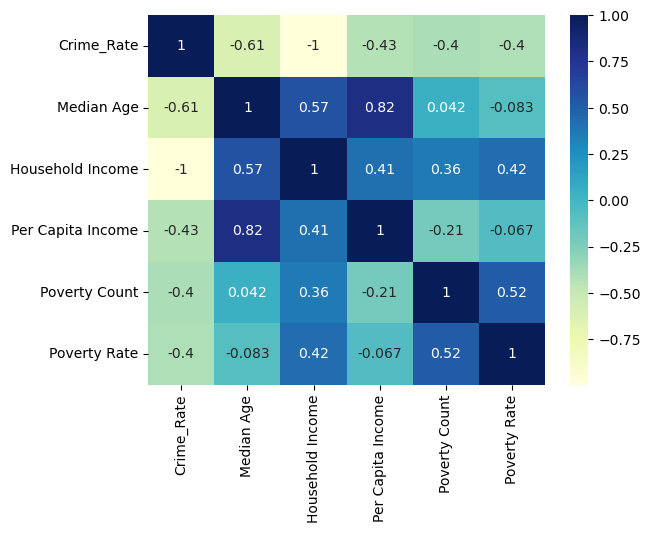

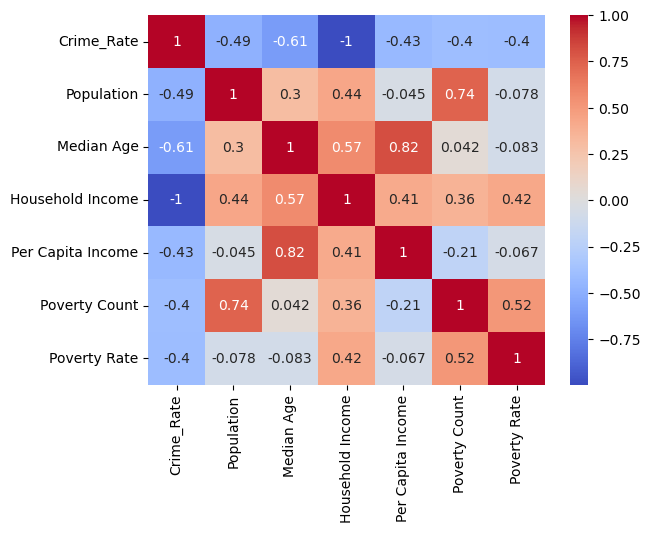

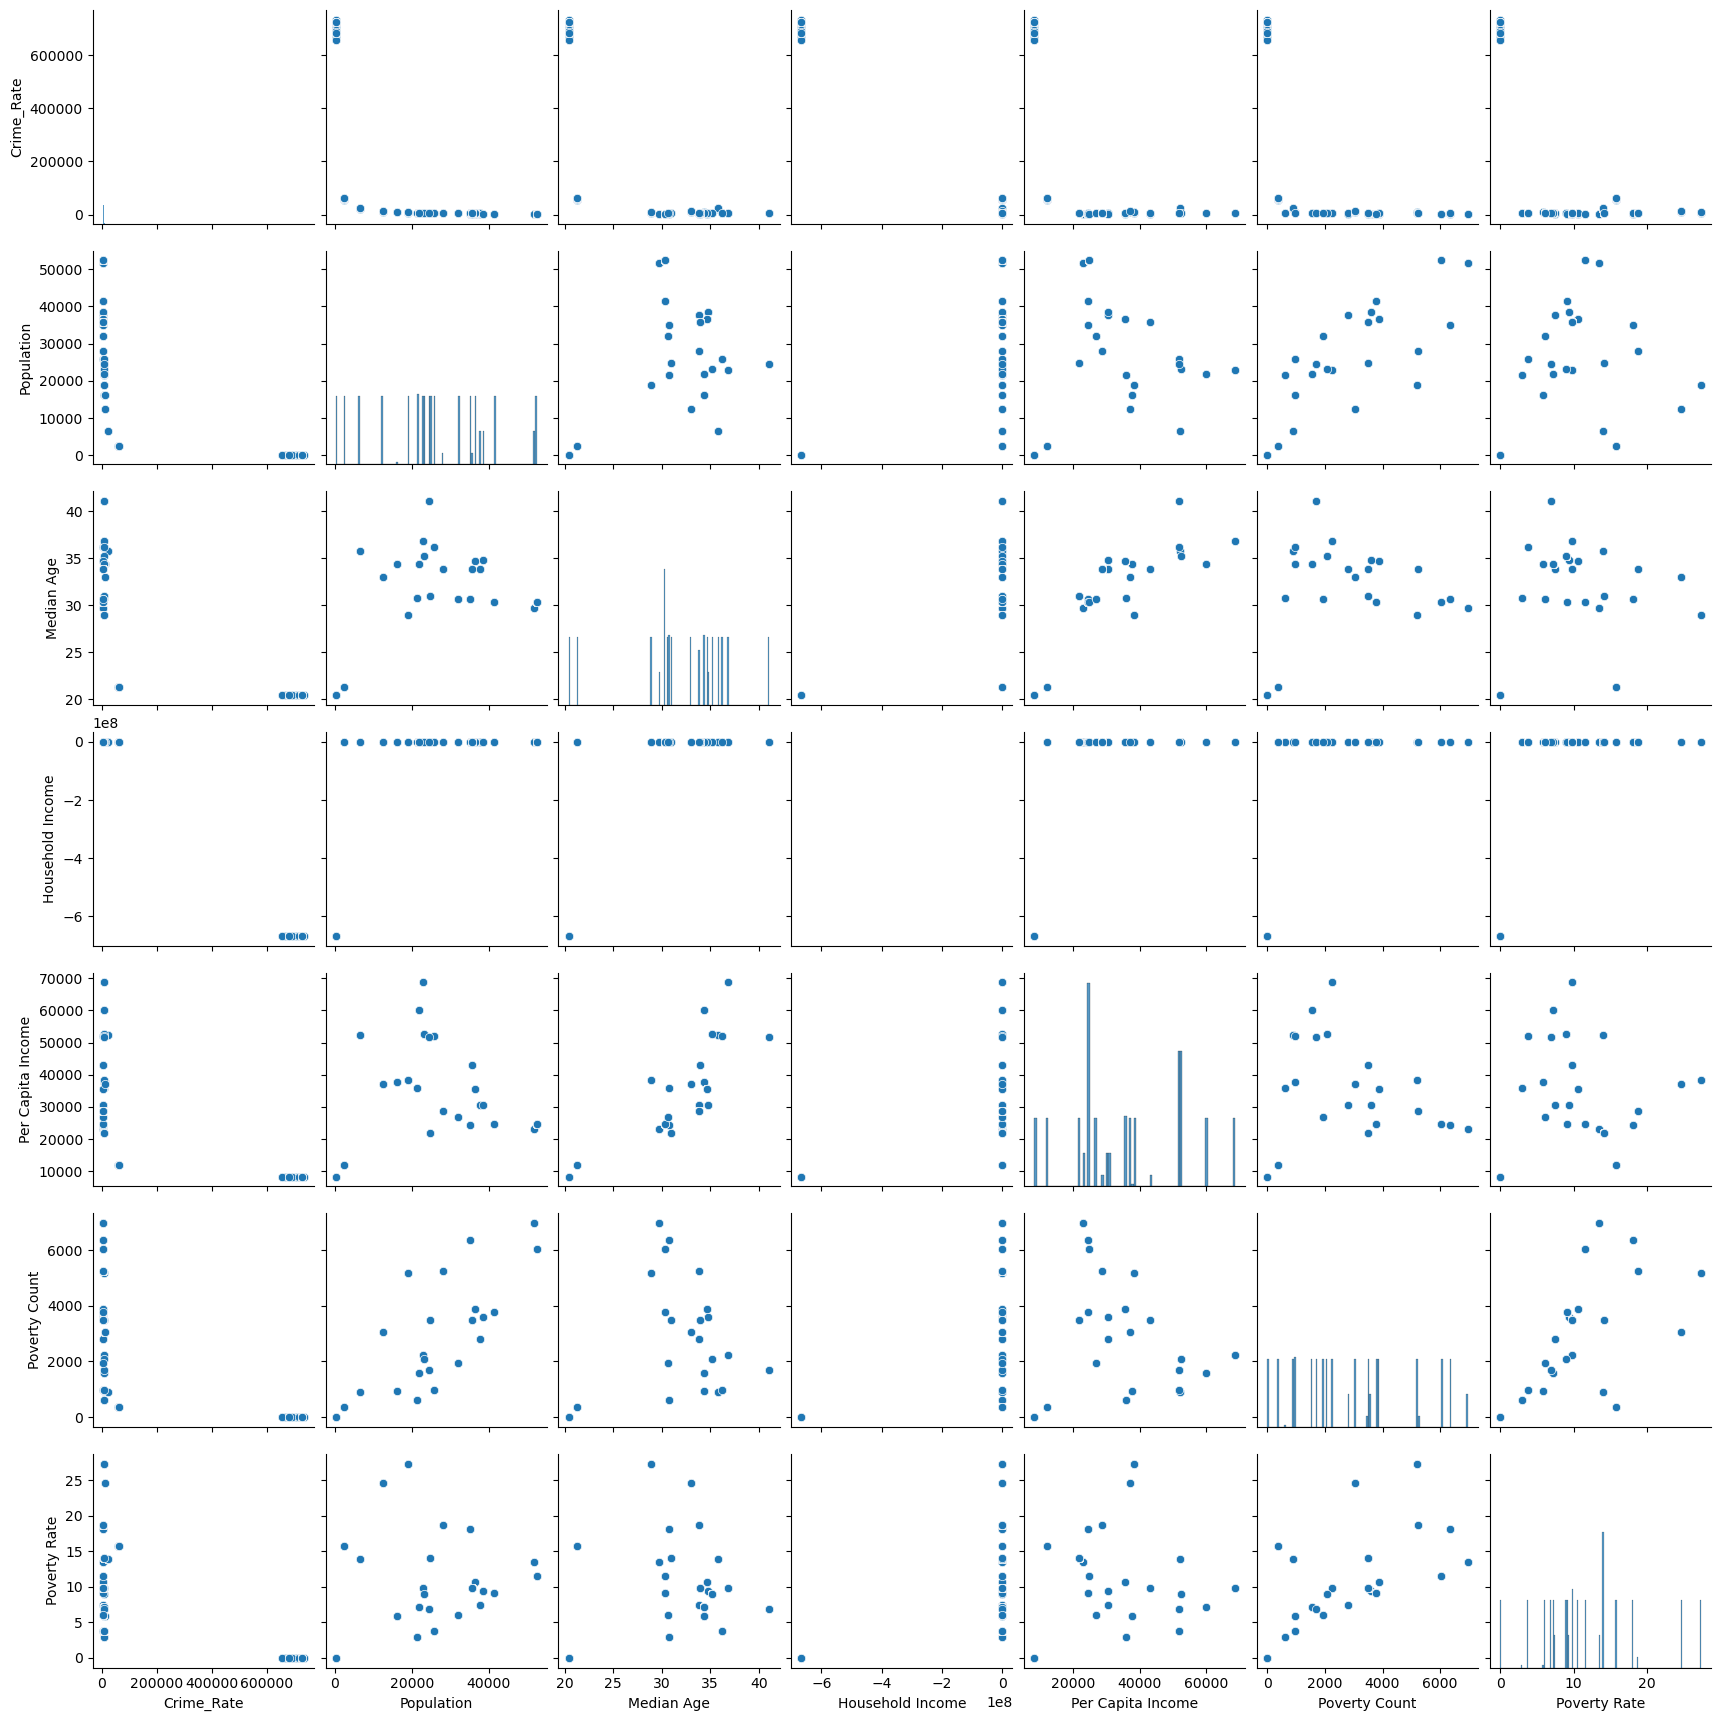

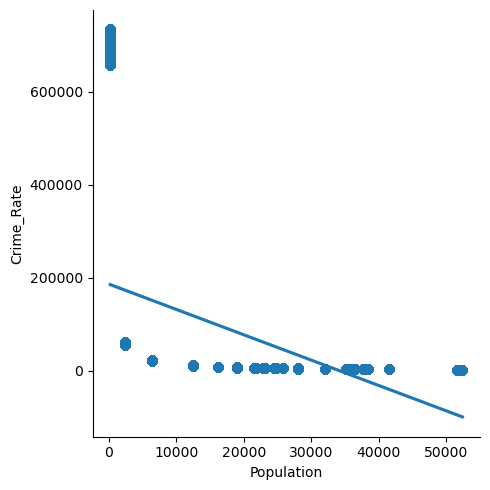

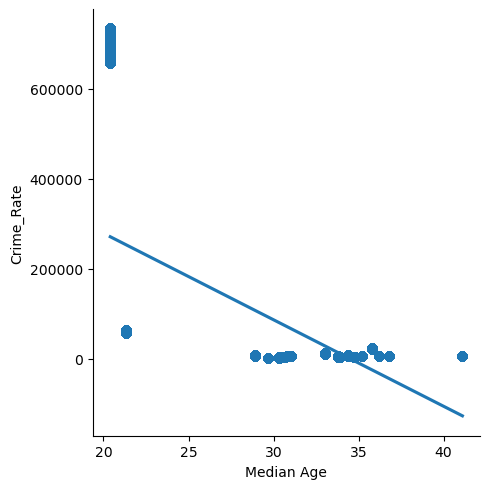

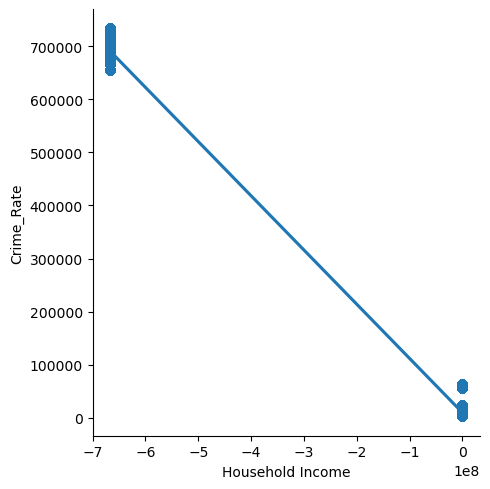

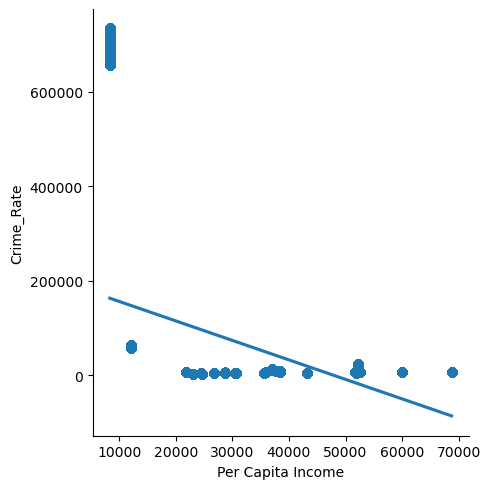

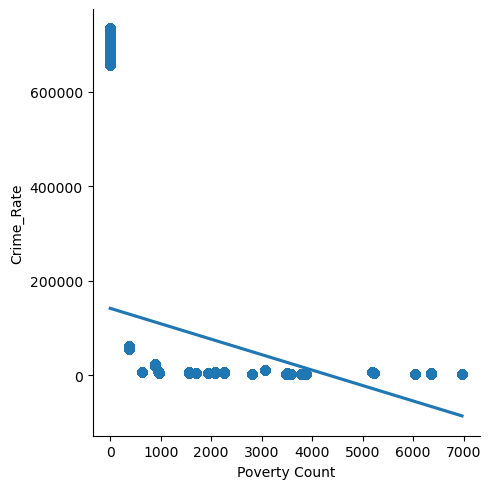

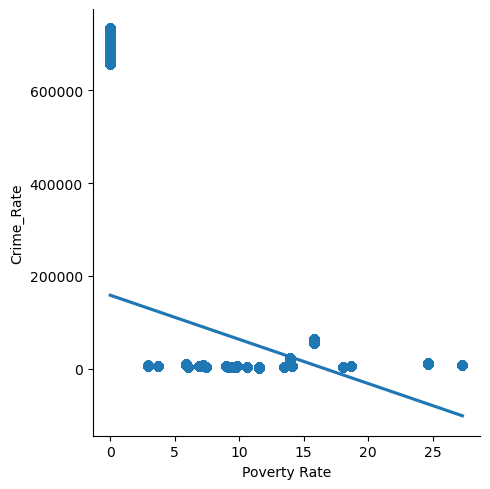

In [5]:
# Plot correlation matrix between crime rate and demographic variables
corr = merged_data[['Crime_Rate', 'Median Age', 'Household Income', 'Per Capita Income', 'Poverty Count', 'Poverty Rate']].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

# Select relevant columns for correlation analysis
corr_data = merged_data[['Crime_Rate', 'Population', 'Median Age', 'Household Income', 'Per Capita Income', 'Poverty Count', 'Poverty Rate']]

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Plot correlation matrix heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Plot scatter plot matrix
sns.pairplot(corr_data)

# Fit linear regression models and plot regression line on scatter plots
sns.lmplot(x='Population', y='Crime_Rate', data=merged_data)
sns.lmplot(x='Median Age', y='Crime_Rate', data=merged_data)
sns.lmplot(x='Household Income', y='Crime_Rate', data=merged_data)
sns.lmplot(x='Per Capita Income', y='Crime_Rate', data=merged_data)
sns.lmplot(x='Poverty Count', y='Crime_Rate', data=merged_data)
sns.lmplot(x='Poverty Rate', y='Crime_Rate', data=merged_data)

#Show all plots
plt.show()

In [6]:
#Fit multiple linear regression model
X = merged_data[['Population', 'Median Age', 'Household Income', 'Per Capita Income', 'Poverty Count', 'Poverty Rate']]
y = merged_data['Crime_Rate']

X = sm.add_constant(X) # add constant term to X matrix
model = sm.OLS(y, X).fit() # fit OLS model

#Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Crime_Rate   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.784e+07
Date:                Thu, 06 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:03:06   Log-Likelihood:            -5.0351e+06
No. Observations:              488247   AIC:                         1.007e+07
Df Residuals:                  488240   BIC:                         1.007e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              9.976e+04    157.22